<a href="https://colab.research.google.com/github/vlamen/tue-deeplearning/blob/main/assignments/assignment_2_3/a3_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Number: 47

# Student 1: Ahmet Ayrancioglu
# Student 2: Ricardo Andrade
# Student 3: Ruben Wolters


# Downloading Data and Preliminaries

In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from zipfile import ZipFile
import requests
import io

In [ ]:
def load_zip(url):
    response = requests.get(url)
    response.raise_for_status()
    zipf = ZipFile(io.BytesIO(response.content))
    return {name: zipf.read(name) for name in zipf.namelist()}

def load_pickle(zipfile, fn):
    return pickle.load(io.BytesIO(zipfile[fn]))

In [ ]:
data = load_zip('https://surfdrive.surf.nl/files/index.php/s/cwqGaS22KXgnXtg/download')

# simulation_{train, valid, test} is stored as a list of simulations. 
# Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
simulation_train = load_pickle(data, 'data/train/simulation.pickle')  # 3.1 + 3.2
simulation_valid = load_pickle(data, 'data/valid/simulation.pickle')  # 3.1 + 3.2
simulation_test = load_pickle(data, 'data/test/simulation.pickle')  # 3.1 + 3.2

# charges_{train, valid, test} is stored as a list of simulation-charges. 
# These charges are stored as numpy arrays of size (3,): One value for each charge.
charges_train = load_pickle(data, 'data/train/charges.pickle')  # 3.1
charges_valid = load_pickle(data, 'data/valid/charges.pickle')  # 3.1
charges_test = load_pickle(data, 'data/test/charges.pickle')  # 3.1

# simulation_continued_{train, valid, test} is stored as a list of simulations. 
# Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
simulation_continued_train = load_pickle(data, 'data/train/simulation_continued.pickle')  # 3.2
simulation_continued_valid = load_pickle(data, 'data/valid/simulation_continued.pickle')  # 3.2
simulation_continued_test = load_pickle(data, 'data/test/simulation_continued.pickle')  # 3.2

# Note that the indices are shared throughout the different lists, e.g., for the 4th training simulation:
# simulation_train[3] contains its initial simulation
# charges_train[3] contains the charges associated with the simulation
# simulation_continued_train[3] contains the continuation of the simulation 
#                 --> simulation_continued_train[3][0] is the state after simulation_train[3][-1]

In [ ]:
# len (800, 100, 100) for (train, valid, test). Each has (t, 2) of particle coordinates inside
# simulation_{train, valid, test}

# len (800, 100, 100) for (train, valid, test). Each has (3,) of particle charges.
# charges_{train, valid, test}

# len (150, 100, 100) for (train, valid, test). Each has (t, 2) of particle coordinates inside.
# simulation_continued_{train, valid, test}

In [ ]:
print('Overview of no. datapoints:\n')

print('Task 3.1:')
print(f'{len(simulation_train)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(charges_train)} train, {len(charges_valid)} validation, {len(charges_test)} test charge pairs')
print()

print('Task 3.2:')
print('Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations')
print('We cut simulation_train down to the first 150 samples in simulation_train_task32')
simulation_train_task32 = simulation_train[:150]
print(f'{len(simulation_train_task32)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(simulation_continued_train)} train, {len(simulation_continued_valid)} validation, {len(simulation_continued_test)} test continuations')

print(f"""
For task 3.1, use:
{chr(10).join(["simulation_{} + charges_{}".format(t, t) for t in ["train", "valid", "test"]])}

For task 3.2, use:
{chr(10).join(["simulation_{} + simulation_continued_{}".format(*((t[0], t[1]) if isinstance(t, tuple) else (t, t))) for t in [("train_task32", "train"), "valid", "test"]])}
""")


Overview of no. datapoints:

Task 3.1:
800 train, 100 validation, 100 test simulations
800 train, 100 validation, 100 test charge pairs

Task 3.2:
Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations
We cut simulation_train down to the first 150 samples in simulation_train_task32
150 train, 100 validation, 100 test simulations
150 train, 100 validation, 100 test continuations

For task 3.1, use:
simulation_train + charges_train
simulation_valid + charges_valid
simulation_test + charges_test

For task 3.2, use:
simulation_train_task32 + simulation_continued_train
simulation_valid + simulation_continued_valid
simulation_test + simulation_continued_test



In [ ]:
def plot_example(x, x_gt=None, x_pred=None, fn=None):
    charge_locations = np.array([[-1.53846154, -1.53846154],
                                 [ 1.53846154, -1.53846154],
                                 [ 0.        ,  1.53846154]])  # charge locations are fixed
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    plt.plot(x[:, 0], x[:, 1], color=cmap(0))
    plt.plot(x[0, 0], x[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(5, 5)
    for charge in charge_locations:
        plt.plot(charge[0], charge[1], 'd', color='black')
    if x_gt is not None:
        plt.plot(x_gt[:, 0], x_gt[:, 1], color='red', linewidth=.5)
    if x_pred is not None:
        plt.plot(x_pred[:, 0], x_pred[:, 1], color='green', linestyle='--')
    if fn is None:
        plt.show()
    else:
        plt.savefig(fn)

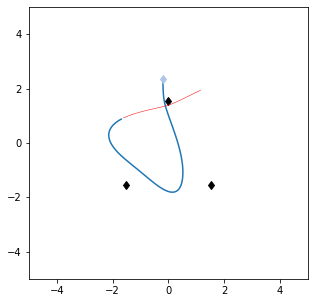

Charges are [-0.49245805 -0.16932145 -0.84001937]


In [ ]:
test_idx = np.random.randint(150)
plot_example(simulation_train[test_idx], simulation_continued_train[test_idx])
print(f'Charges are {charges_train[test_idx]}')

# Imports

In [ ]:
!pip install pytorch-lightning --quiet
!pip install torchmetrics==0.8.2 --quiet

     |████████████████████████████████| 585 kB 36.3 MB/s 
     |████████████████████████████████| 140 kB 54.5 MB/s 
     |████████████████████████████████| 419 kB 70.3 MB/s 
     |████████████████████████████████| 596 kB 57.0 MB/s 
     |████████████████████████████████| 1.1 MB 55.9 MB/s 
     |████████████████████████████████| 271 kB 6.6 MB/s 
     |████████████████████████████████| 144 kB 33.8 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 409 kB 37.0 MB/s 


In [ ]:
import pytorch_lightning as pl
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from pytorch_lightning.callbacks import TQDMProgressBar
from pytorch_lightning import loggers as pl_loggers
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from pytorch_lightning.loggers import CSVLogger


pl.seed_everything(42, workers=True)

Global seed set to 42


42

# Task 3.1

## Data Handling and Preprocessing

In [ ]:
def pad_collate(batch):
  # batch= batch_size * (X, y)
  X = [b[0] for b in batch]
  X = pad_sequence(X, batch_first=True)

  y = torch.stack([b[1] for b in batch])

  x_lens = torch.tensor(np.array([len(b[0]) for b in batch]))

  return X, y, x_lens

class ParticleDataset(Dataset):
  def __init__(self, X, y):
    self.X = [torch.FloatTensor(x) for x in X]
    self.y = torch.FloatTensor(y)
        
  def __getitem__(self, index):
    x = self.X[index]
    y = self.y[index]
    return x, y
  
  def __len__(self):
    return len(self.X)


class ParticleDataModule(pl.LightningDataModule):
  def __init__(self,
               simulation_train, charges_train,
               simulation_valid, charges_valid,
               simulation_test, charges_test,
               batch_size
               ):
    super().__init__()
    self.batch_size = batch_size
    
    self.sim_train = simulation_train
    self.sim_val = simulation_valid
    self.sim_test = simulation_test
    
    self.chg_train = charges_train
    self.chg_val = charges_valid
    self.chg_test = charges_test

  def setup(self, stage=None):
    X_train = self.sim_train
    X_valid = self.sim_val
    X_test = self.sim_test
    
    y_train = self.chg_train
    y_valid = self.chg_val 
    y_test = self.chg_test

    self.train = ParticleDataset(X_train, y_train)
    self.valid = ParticleDataset(X_valid, y_valid)
    self.test = ParticleDataset(X_test, y_test)

  def train_dataloader(self):
    return DataLoader(self.train, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate)

  def val_dataloader(self):
    return DataLoader(self.valid, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate)

  def test_dataloader(self):
    return DataLoader(self.test, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate)

  def predict_dataloader(self):
    return DataLoader(self.test, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate)

## Model Implementation

In [ ]:
class ComplexNet(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()

    # RNN
    self.hidden_size = 32
    self.num_layers = 1
    self.rnn = nn.GRU(input_size, self.hidden_size, self.num_layers, batch_first=True)
    
    # Dense
    self.fc = nn.Sequential(
      nn.Linear(self.hidden_size, output_size),
    )

  def forward(self, x, x_lens):
    # pack the sequences
    packed = pack_padded_sequence(x, x_lens.cpu(), batch_first=True, enforce_sorted=False)
    
    # run it throught rnn
    out, hidden = self.rnn(packed)

    # unpack
    out, lens_unpacked = pad_packed_sequence(out, batch_first=True)

    # get the needed hidden inputs
    out = out[range(out.shape[0]), lens_unpacked - 1]

    # run it through dense layers
    y = self.fc(out)

    return y


class ModelSystem(pl.LightningModule):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.loss = nn.MSELoss()
    self.model = ComplexNet(input_size, output_size)

  def forward(self, X, x_lens):
    out = self.model(X, x_lens)
    return out

  def training_step(self, batch, batch_idx):
    X, y, x_lens = batch
    y_pred = self(X, x_lens)
    loss = self.loss(y_pred, y)
    r2 = self.r2_loss(y_pred, y)

    # self.log("performance", {"loss": loss, "r2": r2})
    self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    self.log("train_r2", r2, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    return loss

  def validation_step(self, batch, batch_idx):
    X, y, x_lens = batch
    y_pred = self(X, x_lens)
    loss = self.loss(y, y_pred)
    r2 = self.r2_loss(y_pred, y)

    self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    self.log("val_r2", r2, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    return loss

  def test_step(self, batch, batch_idx):
    X, y, x_lens = batch
    y_pred = self(X, x_lens)
    loss = self.loss(y, y_pred)
    r2 = self.r2_loss(y_pred, y)

    self.log("test_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    self.log("test_r2", r2, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    return loss

  def predict_step(self, batch, batch_idx):
    X, y, x_lens = batch
    y_pred = self(X, x_lens)
    return y_pred

  def configure_optimizers(self):
    optimizer = torch.optim.AdamW(self.parameters(), lr=1e-2)
    return optimizer

  def r2_loss(self, output, target):
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

## Model Training

In [ ]:
# Dataset
particle_data = ParticleDataModule(simulation_train, charges_train, 
                                   simulation_valid, charges_valid, 
                                   simulation_test, charges_test, 
                                   128,
                                  )

# Model
# input: x,y, output: c_1, c_2, c_3
model = ModelSystem(input_size=2, output_size=3)

# logger
logger = CSVLogger("logs", name="ass-3.1")

# Trainer
trainer = pl.Trainer(
      accelerator="gpu",
      devices=1,
      max_epochs=160,
      log_every_n_steps=50,
      check_val_every_n_epoch=10,
      num_sanity_val_steps=1,
      logger=logger,
    )

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, particle_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  from ipykernel import kernelapp as app
Missing logger folder: logs/ass-3.1
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | loss  | MSELoss    | 0     
1 | model | ComplexNet | 3.6 K 
-------------------------------------
3.6 K     Trainable params
0         Non-trainable params
3.6 K     Total params
0.014     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1937: PossibleUserWarning: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

## Evaluation

In [ ]:
test_results = trainer.test(datamodule=particle_data, ckpt_path='best', verbose=False)
print(test_results)

Restoring states from the checkpoint path at logs/ass-3.1/version_0/checkpoints/epoch=159-step=1120.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at logs/ass-3.1/version_0/checkpoints/epoch=159-step=1120.ckpt


Testing: 0it [00:00, ?it/s]

[{'test_loss': 0.003329704748466611, 'test_r2': 0.959990382194519}]


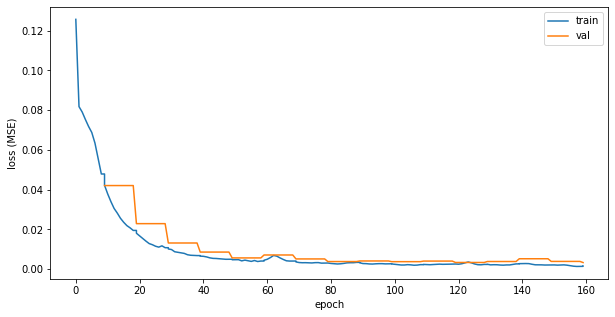

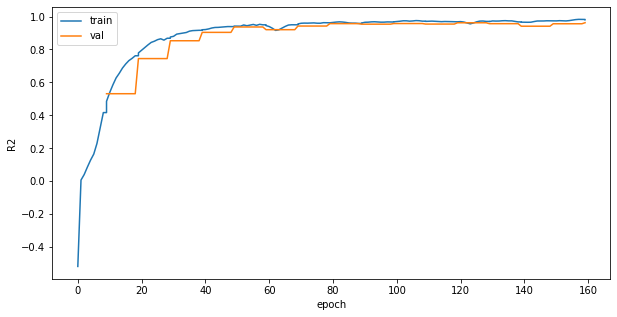

In [ ]:
# Plot the training and validation loss
metric_df: pd.DataFrame = pd.read_csv("/content/logs/ass-3.1/version_0/metrics.csv")
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='train_loss', xlabel='epoch', ylabel='loss (MSE)', label='train', figsize=(10,5))
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='val_loss', ax=ax, label='val')

# Plot the training and validation r2
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='train_r2', xlabel='epoch', ylabel='R2', label='train', figsize=(10,5))
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='val_r2', ax=ax, label='val')

Restoring states from the checkpoint path at logs/ass-3.1/version_0/checkpoints/epoch=159-step=1120.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at logs/ass-3.1/version_0/checkpoints/epoch=159-step=1120.ckpt


Predicting: 7it [00:00, ?it/s]

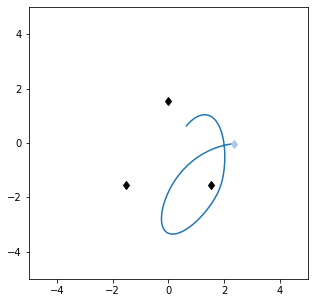

charges true: tensor([-0.1285, -0.9564, -0.1310], dtype=torch.float64)
charges pred: tensor([-0.2458, -1.0815, -0.3467])
mse loss: 0.025318901526594193


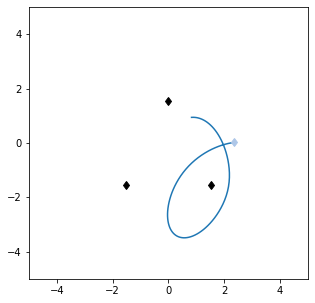

charges true: tensor([-0.0629, -0.9295, -0.1001], dtype=torch.float64)
charges pred: tensor([-0.1715, -0.9927, -0.2836])
mse loss: 0.01648248712160202


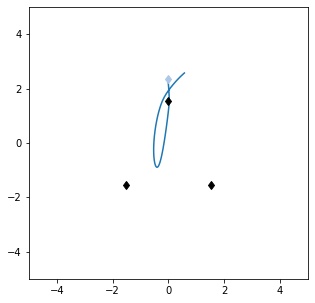

charges true: tensor([-0.1111, -0.0509, -0.6288], dtype=torch.float64)
charges pred: tensor([-0.1800, -0.1159, -0.7852])
mse loss: 0.011151371715834461


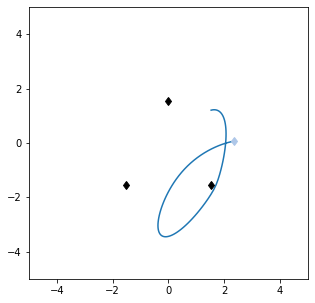

charges true: tensor([-0.1416, -0.8942, -0.1479], dtype=torch.float64)
charges pred: tensor([-0.2286, -1.0127, -0.2553])
mse loss: 0.011050871630675358


In [ ]:
# Investigate some cases where your model fails, and describe why you think this is the case.
def investigate_fail_cases(topk=3):

  # the pairwise error function
  def pairwise_error(output, target):
    return torch.sum((output - target) ** 2, axis=1) / target.shape[1]

  # make predictions on the test set
  charges_pred = trainer.predict(datamodule=particle_data, ckpt_path='best')[0]
  charges_true = torch.tensor(np.vstack(charges_test))

  # find top 3 worse performing cases
  errors = pairwise_error(charges_pred, charges_true)
  sorted, indices = errors.sort(descending=True)
  fail_case_idx = indices[:topk]
  fail_case_idx

  for fail_case_index in fail_case_idx:
    fail_simulation = simulation_test[fail_case_index]
    c_true = charges_true[fail_case_index]
    c_pred = charges_pred[fail_case_index]
    error = errors[fail_case_index]
    plot_example(fail_simulation)
    print(f'charges true: {c_true}')
    print(f'charges pred: {c_pred}')
    print(f'mse loss: {error}')

investigate_fail_cases(topk=4)

# Task 3.2

## Data Handling and Preprocessing

In [ ]:
def pad_collate_32(batch):
  # batch batch_size x (X, y)
  X = [b[0] for b in batch]
  X = pad_sequence(X, batch_first=True)

  y = [b[1] for b in batch]
  y = pad_sequence(y, batch_first=True)

  x_lens = torch.tensor(np.array([len(b[0]) for b in batch]))
  y_lens = torch.tensor(np.array([len(b[1]) for b in batch]))

  return X, y, x_lens, y_lens

class ParticleDataset32(Dataset):
  def __init__(self, X, y):
    self.X = [torch.FloatTensor(x) for x in X]
    self.y = [torch.FloatTensor(yy) for yy in y]
        
  def __getitem__(self, index):
    x = self.X[index]
    y = self.y[index]
    return x, y
  
  def __len__(self):
    return len(self.X)


class ParticleDataModule32(pl.LightningDataModule):
  def __init__(self,
               simulation_train, simulation_continued_train,
               simulation_valid, simulation_continued_valid,
               simulation_test, simulation_continued_test,
               batch_size
               ):
    super().__init__()
    self.batch_size = batch_size
    
    self.sim_train = simulation_train
    self.sim_val = simulation_valid
    self.sim_test = simulation_test
    
    self.sim_cont_train = simulation_continued_train
    self.sim_cont_val = simulation_continued_valid
    self.sim_cont_test = simulation_continued_test

  def setup(self, stage=None):
    X_train = self.sim_train
    X_valid = self.sim_val
    X_test = self.sim_test
    
    y_train = self.sim_cont_train
    y_valid = self.sim_cont_val 
    y_test = self.sim_cont_test

    self.train = ParticleDataset32(X_train, y_train)
    self.valid = ParticleDataset32(X_valid, y_valid)
    self.test = ParticleDataset32(X_test, y_test)

  def train_dataloader(self):
    return DataLoader(self.train, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate_32)

  def val_dataloader(self):
    return DataLoader(self.valid, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate_32)

  def test_dataloader(self):
    return DataLoader(self.test, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate_32)

  def predict_dataloader(self):
    return DataLoader(self.test, batch_size=self.batch_size, num_workers=2, pin_memory=True, collate_fn=pad_collate_32)

## Model Implementation

In [ ]:
class ComplexNet32(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()

    # RNN
    self.hidden_size = 128
    self.num_layers = 2
    self.rnn = nn.GRU(input_size, self.hidden_size, self.num_layers, batch_first=True, 
                      # dropout=0.5
                      )
    
    # Dense
    self.fc = nn.Sequential(
      nn.Linear(self.hidden_size, output_size),
    )

  def forward(self, x, x_lens, y_lens):
    # pack the sequences
    packed = pack_padded_sequence(x, x_lens.cpu(), batch_first=True, enforce_sorted=False)
    
    # run it throught rnn
    out, hidden = self.rnn(packed)

    # unpack
    out, lens_unpacked = pad_packed_sequence(out, batch_first=True)

    # get the needed hidden inputs
    out = out[range(out.shape[0]), lens_unpacked - 1]

    # run it through dense layers
    y = self.fc(out)

    # reshape the predictions to fit the wanted predictions
    y = y.reshape((y.shape[0], -1, 2))
    y = y[:, :max(y_lens), :]
    
    for i in range(len(y)):
      y[i, y_lens[i]:] = 0

    return y

  def init_hidden(self, batch_size):
    hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
    return hidden


class ModelSystem32(pl.LightningModule):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.loss = nn.MSELoss()
    self.model = ComplexNet32(input_size, output_size)

  def forward(self, X, x_lens, y_lens):
    out = self.model(X, x_lens, y_lens)
    return out

  def training_step(self, batch, batch_idx):
    X, y, x_lens, y_lens = batch
    y_pred = self(X, x_lens, y_lens)
    loss = self.loss(y_pred, y)
    r2 = self.r2_loss(y_pred, y)

    self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    self.log("train_r2", r2, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    return loss

  def validation_step(self, batch, batch_idx):
    X, y, x_lens, y_lens = batch
    y_pred = self(X, x_lens, y_lens)
    loss = self.loss(y, y_pred)
    r2 = self.r2_loss(y_pred, y)

    self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    self.log("val_r2", r2, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    return loss

  def test_step(self, batch, batch_idx):
    X, y, x_lens, y_lens = batch
    y_pred = self(X, x_lens, y_lens)
    loss = self.loss(y, y_pred)
    r2 = self.r2_loss(y_pred, y)

    self.log("test_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    self.log("test_r2", r2, on_step=False, on_epoch=True, prog_bar=True, logger=True)
    return loss

  def predict_step(self, batch, batch_idx):
    X, y, x_lens, y_lens = batch
    y_pred = self(X, x_lens, y_lens)
    return y_pred

  def configure_optimizers(self):
    optimizer = torch.optim.AdamW(self.parameters(), lr=1e-3)
    return optimizer

  def r2_loss(self, output, target):
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

## Model Training

In [ ]:
# Dataset
# 100
particle_data32 = ParticleDataModule32(simulation_train_task32, simulation_continued_train,
                                       simulation_valid, simulation_continued_valid,
                                       simulation_test, simulation_continued_test,
                                       16,
                                       )

# Model
# input: (x, y), output: 60*(x, y)
model32 = ModelSystem32(input_size=2, output_size=60 * 2)

# logger
logger = CSVLogger("logs", name="ass-3.2")

# Trainer
trainer = pl.Trainer(
      accelerator="gpu",
      # accelerator="cpu",
      devices=1,
      max_epochs=120,
      log_every_n_steps=5,
      check_val_every_n_epoch=10,
      num_sanity_val_steps=1,
      logger=logger,
    )

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model32, particle_data32)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type         | Params
---------------------------------------
0 | loss  | MSELoss      | 0     
1 | model | ComplexNet32 | 165 K 
---------------------------------------
165 K     Trainable params
0         Non-trainable params
165 K     Total params
0.661     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

## Evaluation

In [ ]:
test_results = trainer.test(datamodule=particle_data32, ckpt_path='best', verbose=False)
print(test_results)

Restoring states from the checkpoint path at logs/ass-3.2/version_3/checkpoints/epoch=119-step=1200.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at logs/ass-3.2/version_3/checkpoints/epoch=119-step=1200.ckpt


Testing: 0it [00:00, ?it/s]

[{'test_loss': 0.27030879259109497, 'test_r2': 0.8625890612602234}]


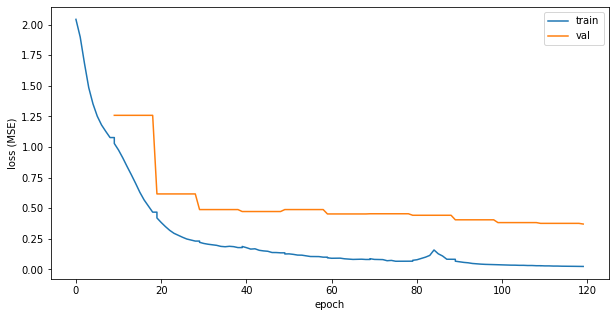

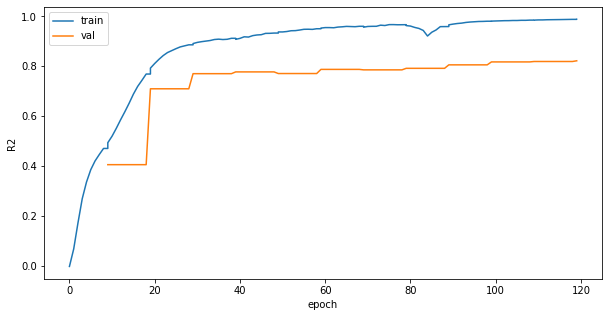

In [ ]:
# Plot the training and validation loss
metric_df: pd.DataFrame = pd.read_csv("/content/logs/ass-3.2/version_1/metrics.csv")
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='train_loss', xlabel='epoch', ylabel='loss (MSE)', label='train', figsize=(10,5))
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='val_loss', ax=ax, label='val')

# Plot the training and validation r2
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='train_r2', xlabel='epoch', ylabel='R2', label='train', figsize=(10,5))
ax = metric_df.fillna(method='ffill').plot(x='epoch', y='val_r2', ax=ax, label='val')

Restoring states from the checkpoint path at logs/ass-3.2/version_0/checkpoints/epoch=119-step=1200.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at logs/ass-3.2/version_0/checkpoints/epoch=119-step=1200.ckpt


Predicting: 10it [00:00, ?it/s]

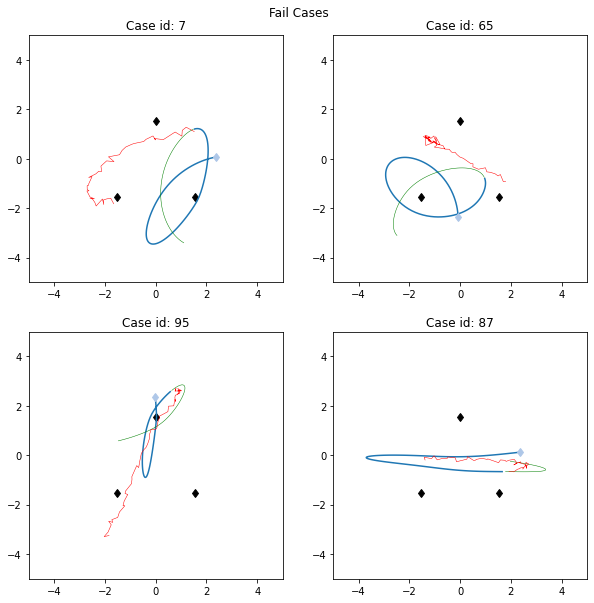

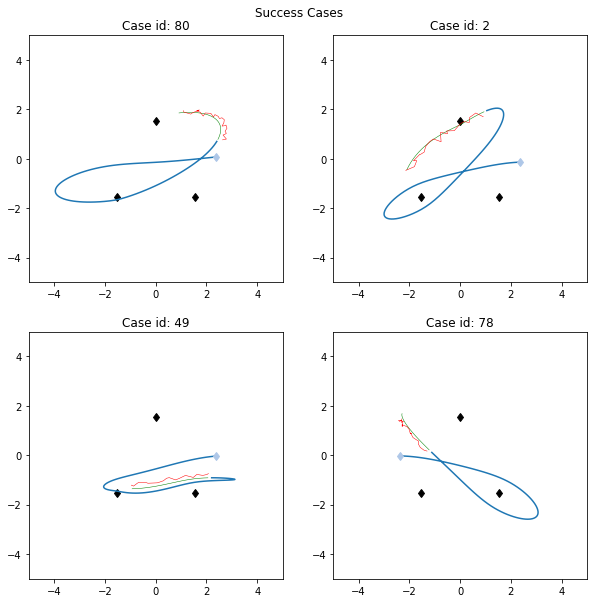

In [ ]:
# investigate a few individual cases; at least one where the model does well, alongside one where it does not.
# Investigate some cases where your model fails, and describe why you think this is the case.

# the pairwise error function
def pairwise_error(output, target):
  output = output.reshape((output.shape[0], -1))
  target = target.reshape((target.shape[0], -1))
  return torch.sum((output - target) ** 2, axis=1) / target.shape[1]

def flatten(xss):
  return [x for xs in xss for x in xs]


# plots 1 case
def plot_paths(ax, sim, sim_cont_true=None, sim_cont_pred=None):
  # charge locations are fixed
  charge_locations = np.array([[-1.53846154, -1.53846154],
                                [ 1.53846154, -1.53846154],
                                [ 0.        ,  1.53846154]])
  # setup
  cmap = matplotlib.cm.get_cmap('tab20')
  ax.set_xlim([-5., 5.])
  ax.set_ylim([-5., 5.])

  # plots the charges
  for charge in charge_locations:
      ax.plot(charge[0], charge[1], 'd', color='black')

  # plots the path of the particle
  ax.plot(sim[:, 0], sim[:, 1], color=cmap(0))

  # plots the start position of the particle
  ax.plot(sim[0, 0], sim[0, 1], 'd', color=cmap(1))
      
  # plots the actual continuation of the path
  if sim_cont_true is not None:
      ax.plot(sim_cont_true[:, 0], sim_cont_true[:, 1], color='green', linewidth=0.5)

  # plots the prediction of the continued path
  if sim_cont_pred is not None:
      ax.plot(sim_cont_pred[:, 0], sim_cont_pred[:, 1], color='red', linewidth=0.5)


# plots multiple cases
def plot_cases(simulation_test, simulation_continued_test, simulation_continued_true, simulation_continued_pred, case_idx, title):
  fig, axs = plt.subplots(int(len(case_idx) / 2), 2, figsize=(10,10))
  fig.suptitle(title, y=0.92)
  axs = axs.flatten()

  for i, case_index in enumerate(case_idx):
    fail_simulation = simulation_test[case_index]
    
    length = len(simulation_continued_test[case_index])
    cont_true = simulation_continued_true[case_index][:length]
    cont_pred = simulation_continued_pred[case_index][:length]
    
    # plot
    axs[i].set_title(f"Case id: {case_index}")
    plot_paths(axs[i], fail_simulation, cont_true, cont_pred)


def investigate_cases(topk=4):
  # make predictions on the test set
  simulation_continued_pred = trainer.predict(datamodule=particle_data32, ckpt_path='best')
  simulation_continued_pred = flatten(simulation_continued_pred)
  simulation_continued_pred = pad_sequence(simulation_continued_pred, batch_first=True)

  # ground truth
  simulation_continued_true = pad_sequence(map(torch.tensor, simulation_continued_test), batch_first=True)

  # find top 3 worse and best performing cases
  errors = pairwise_error(simulation_continued_pred, simulation_continued_true)
  sorted, indices = errors.sort(descending=True)
  fail_case_idx = indices[:topk]
  success_case_idx = indices[-topk:]

  # plot them
  plot_cases(
      simulation_test,
      simulation_continued_test, 
      simulation_continued_true, 
      simulation_continued_pred, 
      fail_case_idx,
      "Fail Cases"
      )
  
  plot_cases(
      simulation_test,
      simulation_continued_test, 
      simulation_continued_true, 
      simulation_continued_pred, 
      success_case_idx,
      "Success Cases"
      )

investigate_cases(topk=4)

{'mse': 2.330548874691236, 'r2': -1.507078175763625}

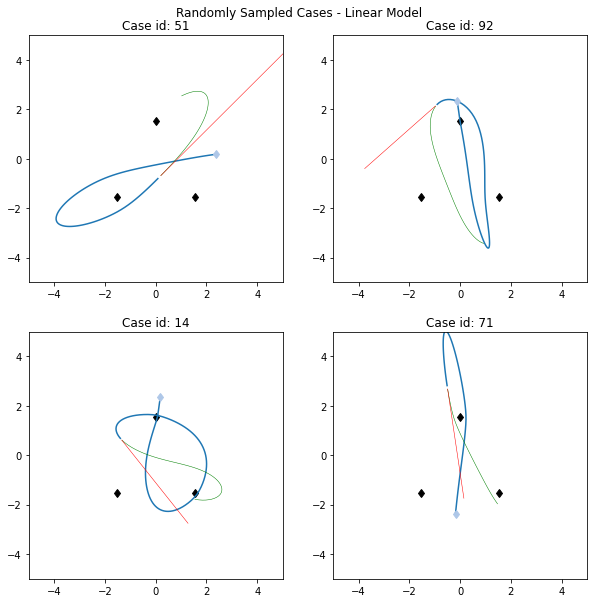

In [ ]:
# compare your model to a simple linear baseline, i.e., extrapolating in the direction between the last 2 timesteps of the input simulation (x_i^t − x_i^{t−∆t}).
def baseline_32(sim, len_sim_cont):
  sim = sim [-2:]
  delta = sim[-1] - sim[-2]

  sim_cont = [sim[-1] + delta]

  for i in range(len_sim_cont - 1):
    pred = sim_cont[-1] + delta
    sim_cont.append(pred)

  pred = np.vstack(sim_cont)
  return pred

def evaluate_baseline():
  preds = []
  for i in range(len(simulation_test)):
    sim = simulation_test[i]
    len_pred = len(simulation_continued_test[i])
    pred = baseline_32(sim, len_pred)
    preds.append(pred)

  preds = pad_sequence(map(torch.tensor, preds), batch_first=True)
  trues = pad_sequence(map(torch.tensor, simulation_continued_test), batch_first=True)

  r2 = r2_score(trues.flatten(1), preds.flatten(1))
  mse = mean_squared_error(trues.flatten(1), preds.flatten(1))

  # plot them
  plot_cases(
      simulation_test,
      simulation_continued_test, 
      trues, 
      preds, 
      np.random.choice(range(len(trues)), 4),
      "Randomly Sampled Cases - Linear Model"
      )
  
  return {'mse': mse, 'r2': r2}

evaluate_baseline()